In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [51]:
df = pd.read_csv('C:/Users/govindd1/Desktop/Code/VR-Project/ACC_data_from_different_subjects/E4_ACC_data.csv')
df.head()

datatime  acc_x  acc_y  acc_z  subject_id  round  \
0         2021-10-27 16:19:17+00:00    -14     22     55           2      1   
1  2021-10-27 16:19:17.031250+00:00     -4     25     61           2      1   
2  2021-10-27 16:19:17.062500+00:00     -7     21     59           2      1   
3  2021-10-27 16:19:17.093750+00:00    -15     20     59           2      1   
4  2021-10-27 16:19:17.125000+00:00    -11     22     66           2      1   

         type     label  
0  MotionLess  standing  
1  MotionLess  standing  
2  MotionLess  standing  
3  MotionLess  standing  
4  MotionLess  standing

In [52]:
df['label'].value_counts()

walking       61546
sitting       39530
standing      23762
upstairs       7711
downstairs     4857
Name: label, dtype: int64

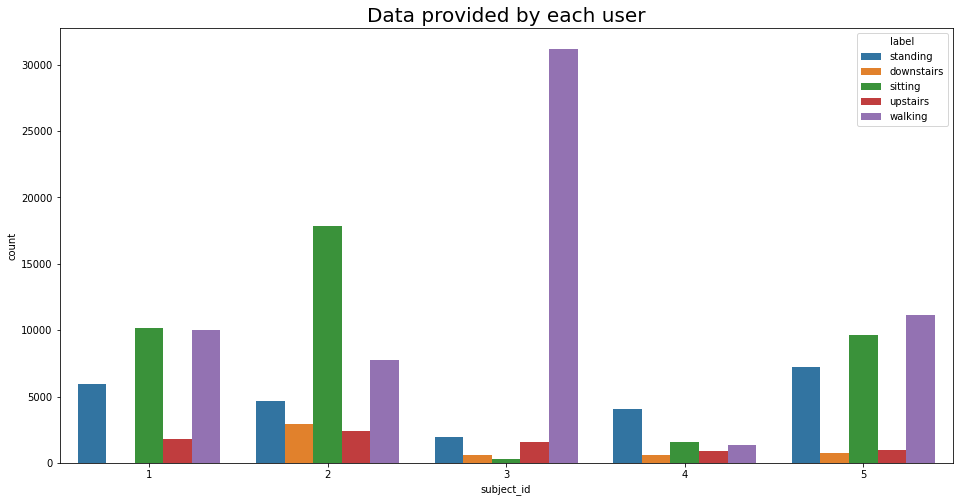

In [53]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject_id',hue='label', data = df)
plt.show()


In [54]:
group_by_label = df.groupby(by=['subject_id'])
gpdf = group_by_label.get_group(5)
gpdf


datatime  acc_x  acc_y  acc_z  subject_id  \
11552          2021-11-09 01:07:17+00:00     12    -60     12           5   
11553   2021-11-09 01:07:17.031250+00:00     13    -61     12           5   
11554   2021-11-09 01:07:17.062500+00:00     13    -60     13           5   
11555   2021-11-09 01:07:17.093750+00:00     13    -60     12           5   
11556   2021-11-09 01:07:17.125000+00:00     12    -60     12           5   
...                                  ...    ...    ...    ...         ...   
112984  2021-11-09 01:17:44.875000+00:00     16     23     56           5   
112985  2021-11-09 01:17:44.906250+00:00     18     20     58           5   
112986  2021-11-09 01:17:44.937500+00:00     20     20     62           5   
112987  2021-11-09 01:17:44.968750+00:00     17     21     63           5   
112988         2021-11-09 01:17:45+00:00     14     19     64           5   

        round        type     label  
11552       1  MotionLess  standing  
11553       1  MotionLess  standing  
11554       1  MotionLess  standing  
11555       1  MotionLess  standing  
11556       1  MotionLess  standing  
...       ...         ...       ...  
112984      1    InMotion   walking  
112985      1    InMotion   walking  
112986      1    InMotion   walking  
112987      1    InMotion   walking  
112988      1    InMotion   walking  

[29766 rows x 8 columns]

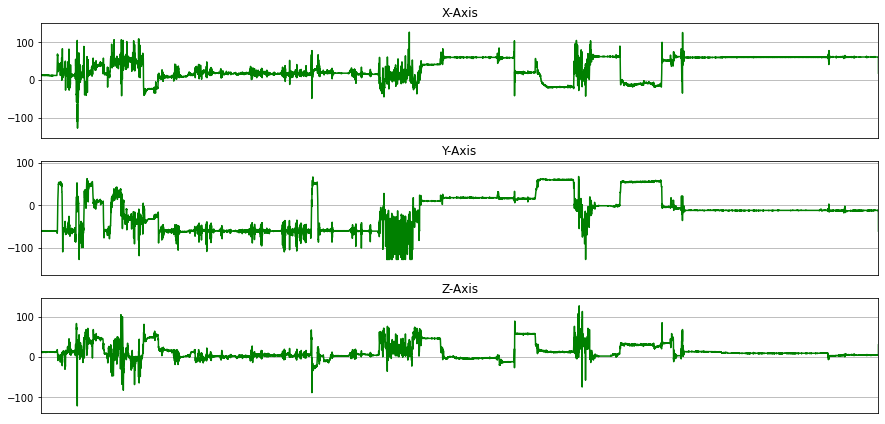

In [12]:
# gpdf[['acc_x']].plot(subplots=True, figsize=(33, 10))
# gpdf[['acc_y']].plot(subplots=True, figsize=(33, 10), color = 'red')
# gpdf[['acc_z']].plot(subplots=True, figsize=(33, 10), color = 'green')


def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
plot_axis(ax0, gpdf['datatime'], gpdf['acc_x'], 'X-Axis')
plot_axis(ax1, gpdf['datatime'], gpdf['acc_y'], 'Y-Axis')
plot_axis(ax2, gpdf['datatime'], gpdf['acc_z'], 'Z-Axis')
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(top=0.90)
plt.show()


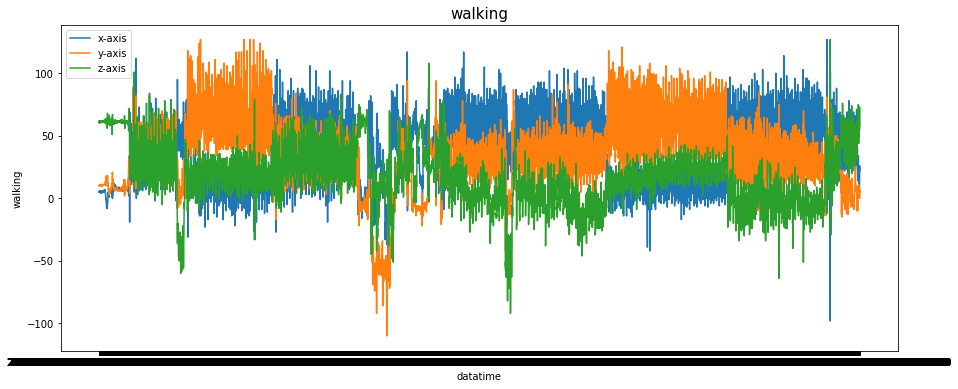

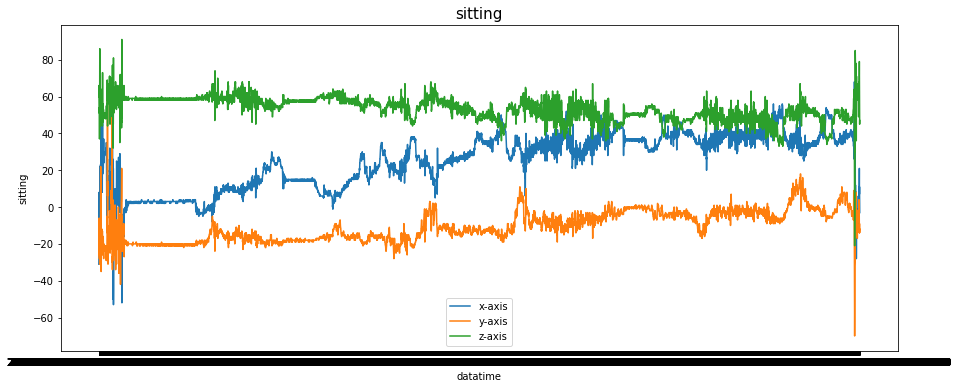

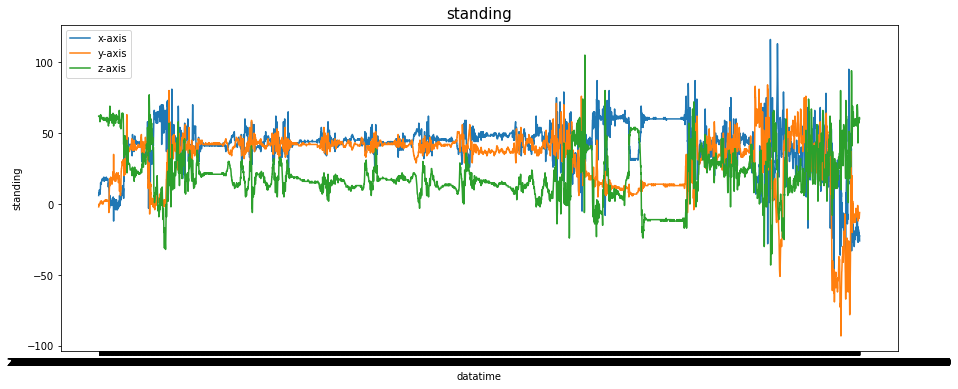

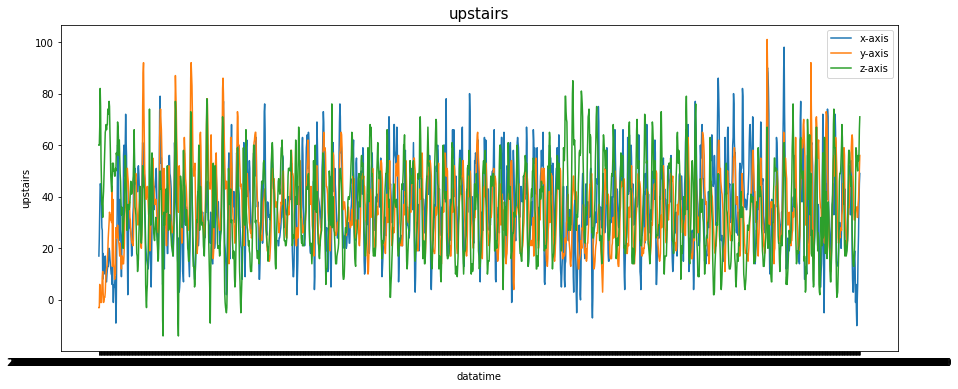

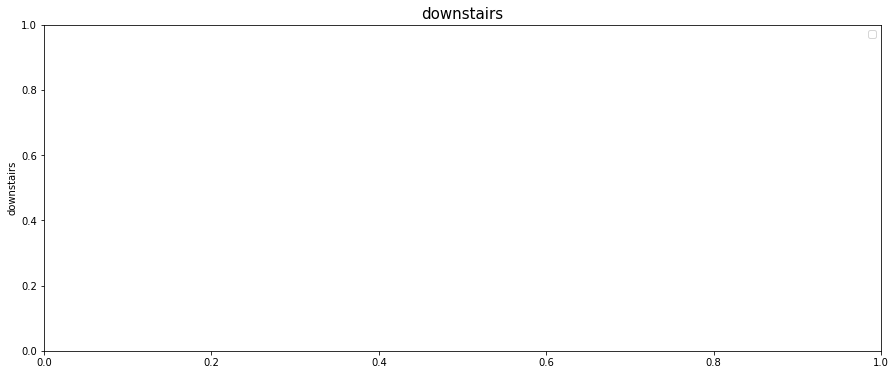

In [17]:
for i in ['walking', 'sitting', 'standing', 'upstairs', 'downstairs']:
    sub_id = df[(df['subject_id'] == 1) & (df['label'] == i)]#[:1000]
    plt.figure(figsize = (15, 6))
    sns.lineplot(y = 'acc_x', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_y', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_z', x = 'datatime', data = sub_id)
    plt.legend(['x-axis', 'y-axis', 'z-axis'])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()




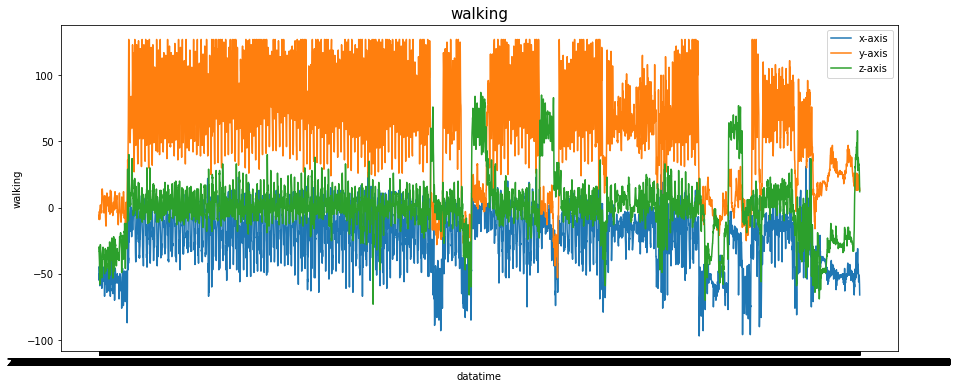

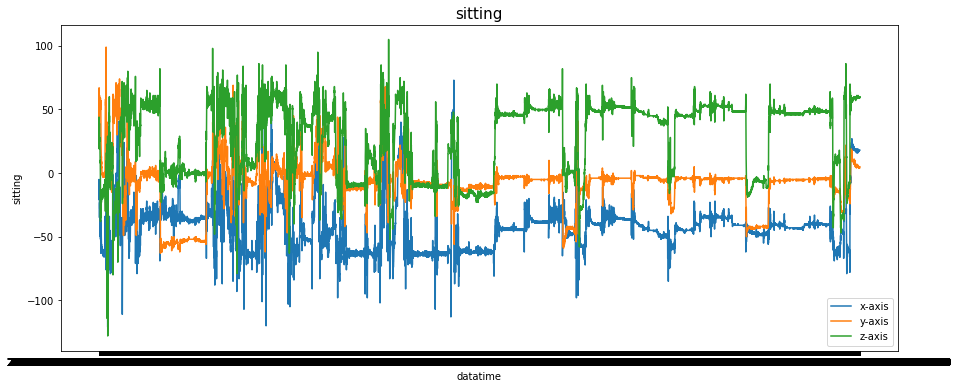

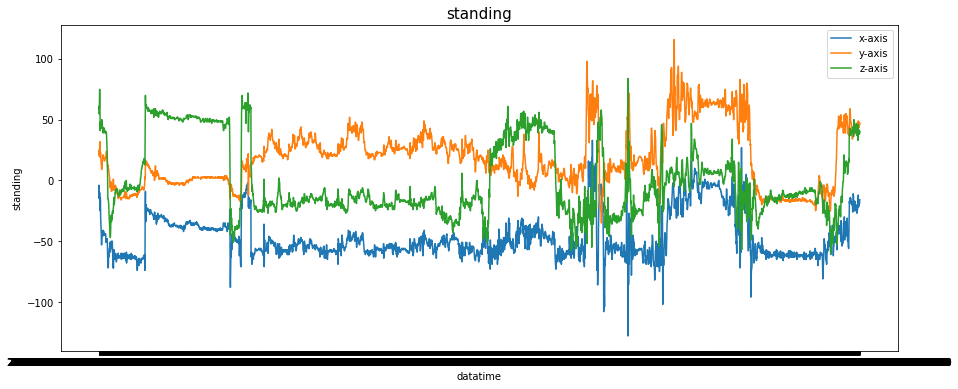

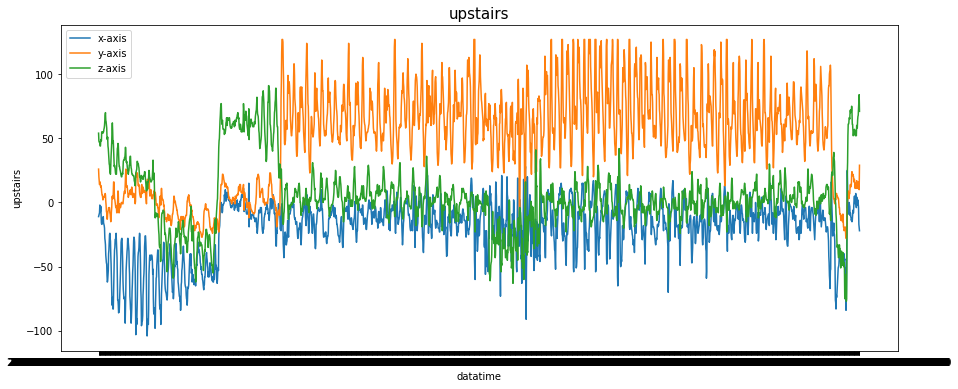

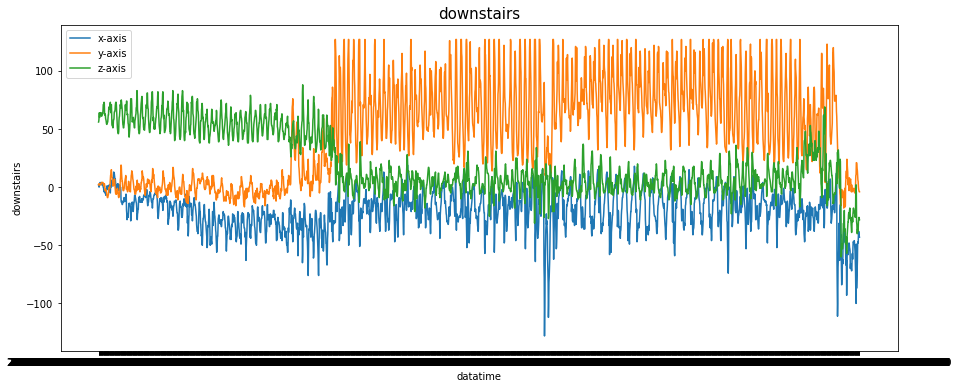

In [18]:
for i in ['walking', 'sitting', 'standing', 'upstairs', 'downstairs']:
    sub_id = df[(df['subject_id'] == 2) & (df['label'] == i)]#[:1000]
    plt.figure(figsize = (15, 6))
    sns.lineplot(y = 'acc_x', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_y', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_z', x = 'datatime', data = sub_id)
    plt.legend(['x-axis', 'y-axis', 'z-axis'])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()

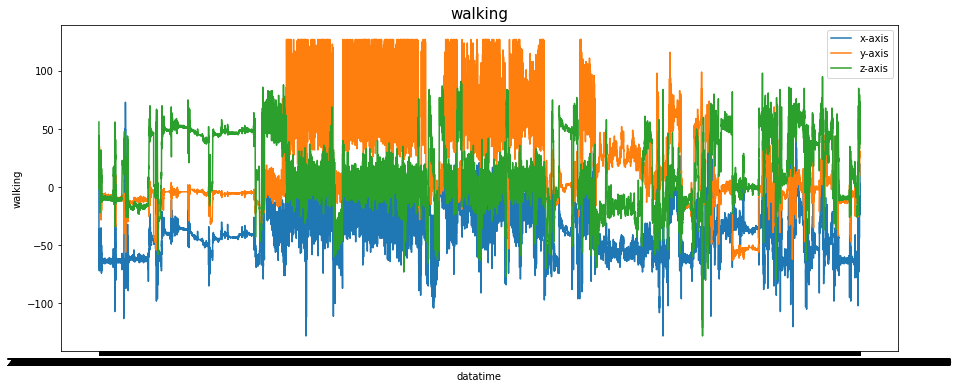

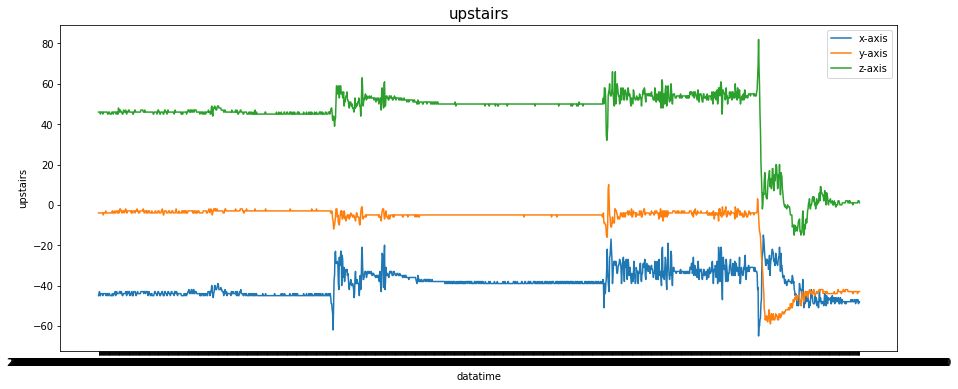

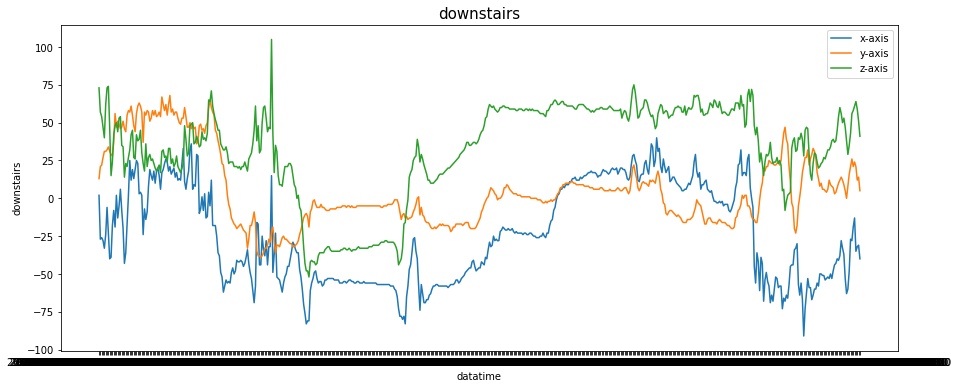

In [19]:
for i in ['walking', 'sitting', 'standing', 'upstairs', 'downstairs']:
    sub_id = df[(df['subject_id'] == 3) & (df['label'] == i)]#[:1000]
    plt.figure(figsize = (15, 6))
    sns.lineplot(y = 'acc_x', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_y', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_z', x = 'datatime', data = sub_id)
    plt.legend(['x-axis', 'y-axis', 'z-axis'])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()

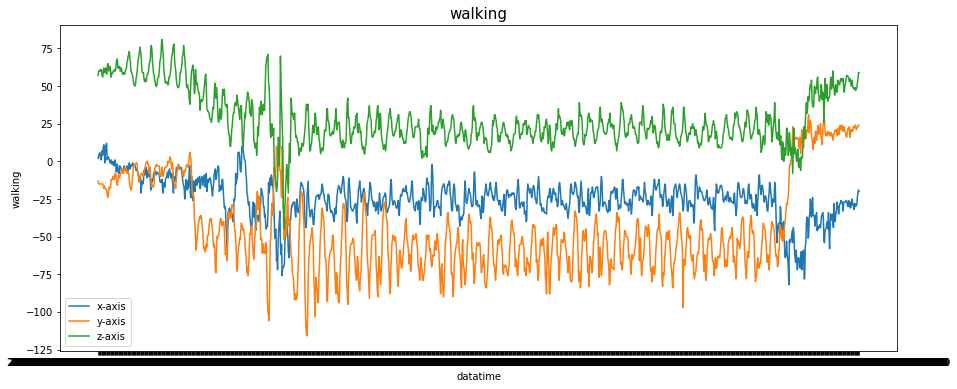

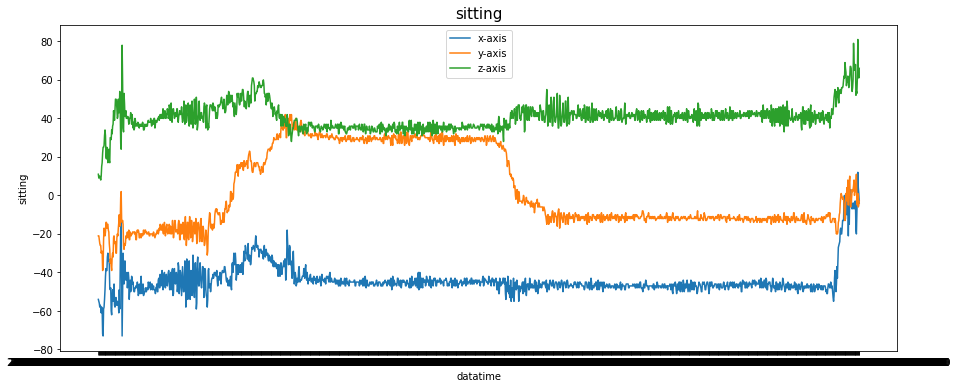

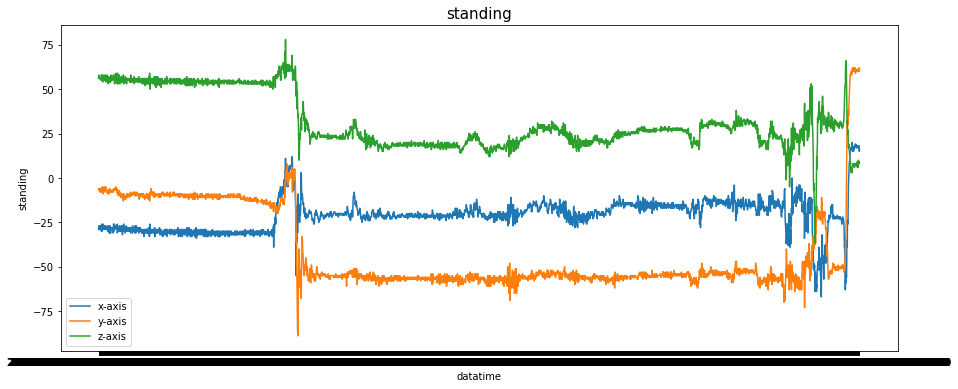

In [20]:
for i in ['walking', 'sitting', 'standing', 'upstairs', 'downstairs']:
    sub_id = df[(df['subject_id'] == 4) & (df['label'] == i)]#[:1000]
    plt.figure(figsize = (15, 6))
    sns.lineplot(y = 'acc_x', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_y', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_z', x = 'datatime', data = sub_id)
    plt.legend(['x-axis', 'y-axis', 'z-axis'])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()

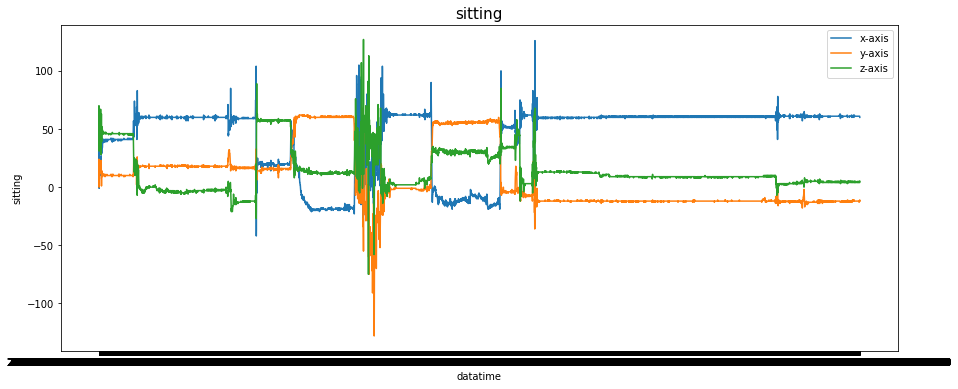

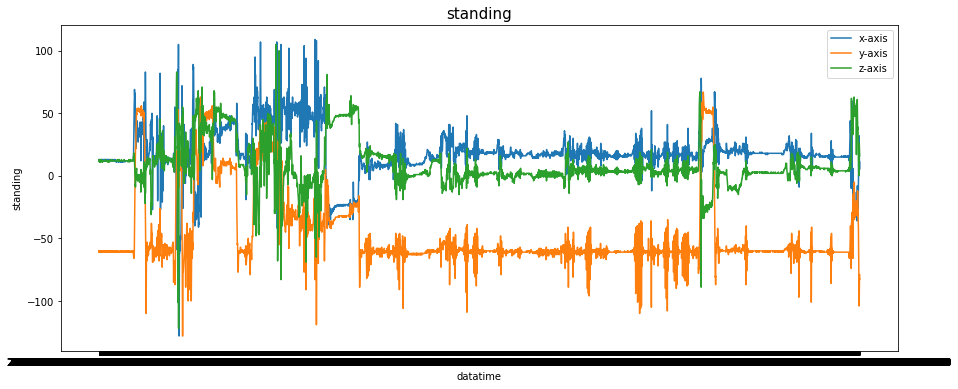

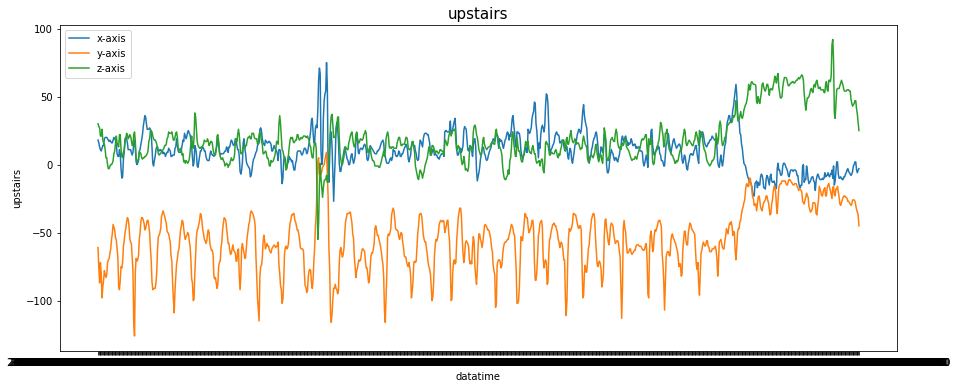

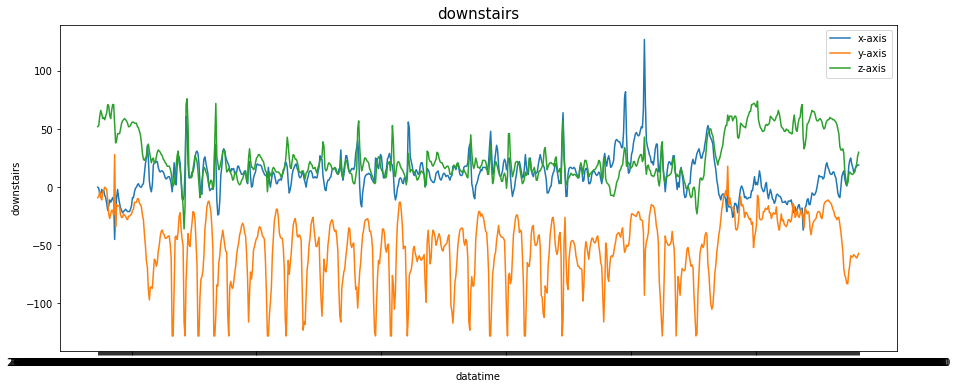

In [21]:
for i in ['walking', 'sitting', 'standing', 'upstairs', 'downstairs']:
    sub_id = df[(df['subject_id'] == 5) & (df['label'] == i)]#[:1000]
    plt.figure(figsize = (15, 6))
    sns.lineplot(y = 'acc_x', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_y', x = 'datatime', data = sub_id)
    sns.lineplot(y = 'acc_z', x = 'datatime', data = sub_id)
    plt.legend(['x-axis', 'y-axis', 'z-axis'])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()

In [22]:
group_by_label = df.groupby(by=['subject_id'])
gpdf5 = group_by_label.get_group(5)

plt.figure(figsize = (15, 6))
sns.lineplot(y = 'acc_x', x = 'datatime', data = gpdf5)
sns.lineplot(y = 'acc_y', x = 'datatime', data = gpdf5)
sns.lineplot(y = 'acc_z', x = 'datatime', data = gpdf5)
plt.legend(['x-axis', 'y-axis', 'z-axis'])
plt.ylabel(i)
plt.title(i, fontsize = 15)
plt.show()

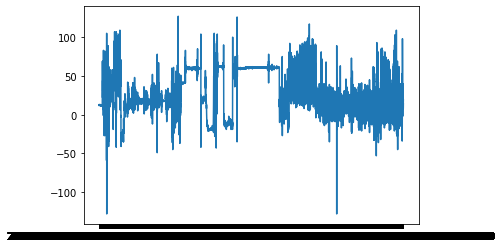

In [25]:
# gpdf5[['acc_x']].plot(subplots=True, figsize=(33, 10))
# gpdf5[['acc_y']].plot(subplots=True, figsize=(33, 10))
# gpdf5[['acc_z']].plot(subplots=True, figsize=(33, 10))

plt.plot(gpdf5['datatime'], gpdf5['acc_x'])

In [36]:
import plotly.express as px

fig = px.line(gpdf5, x="datatime", y="acc_x")
fig.show()


In [41]:
df.value_counts()

datatime                          acc_x  acc_y  acc_z  label     subject_id  round  type      
2021-10-27 15:37:10+00:00          5      10     61    walking   1           1      InMotion      1
2021-10-27 16:29:42.718750+00:00  -41    -5      49    sitting   2           1      MotionLess    1
2021-10-27 16:29:42.937500+00:00  -43    -5      50    sitting   2           1      MotionLess    1
2021-10-27 16:29:42.906250+00:00  -42    -6      50    standing  3           1      MotionLess    1
                                                       sitting   2           1      MotionLess    1
                                                                                                 ..
2021-10-27 16:17:47.062500+00:00  -46     80     17    walking   3           1      InMotion      1
                                                       upstairs  2           1      InMotion      1
2021-10-27 16:17:47.031250+00:00  -41     79    -18    walking   3           1      InMotion      1
     

In [46]:
df[['acc_x', 'acc_y', 'acc_z']].describe()

acc_x          acc_y          acc_z
count  137406.000000  137406.000000  137406.000000
mean       -7.083475       4.495481      19.134397
std        38.658922      43.926624      27.150544
min      -128.000000    -128.000000    -128.000000
25%       -40.000000     -17.000000      -1.000000
50%       -12.000000      -4.000000      15.000000
75%        22.000000      33.000000      46.000000
max       127.000000     127.000000     127.000000

In [47]:
df['label'].value_counts()

walking       61546
sitting       39530
standing      23762
upstairs       7711
downstairs     4857
Name: label, dtype: int64

# Balancing the Class


In [50]:
import imblearn
print(imblearn.__version__)
from collections import Counter



0.8.1
